<a href="https://colab.research.google.com/github/weathon/Chem-Lab-9/blob/dataana/CHEM_211_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pylab
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
df = pd.read_csv("data.csv").replace(np.NaN,0)
mapping_keys = list(df["Class"].drop_duplicates())
map = {}
for i in range(len(mapping_keys)):
    map[mapping_keys[i]] = i

for key in mapping_keys:
    df.loc[df["Class"] == key,"Class"] = map[key]
Y_n = df["Class"]
filter = [name for name in df.columns if (not "CMPD" in name) and (not name in ["Class","Sample ID","THC","CBD"])]
df = df[filter]

Y = []
for i in Y_n:
  tmp = [0, 0, 0, 0]
  tmp[i] = 1
  Y.append(tmp)

In [ ]:
indexs = np.arange(0,len(Y))
np.random.shuffle(indexs)
df = np.array(df)[indexs]
Y = np.array(Y)[indexs]

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(len(df[0]))),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(4, activation="softmax"),
])
model.summary()
# print(model.output_shape)
model.compile(optimizer=tf.keras.optimizers.Adam(),
          loss='categorical_crossentropy',metrics=["accuracy"])

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_104 (Dense)           (None, 20)                200       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_105 (Dense)           (None, 30)                630       
                                                                 
 dense_106 (Dense)           (None, 10)                310       
                                                                 
 dense_107 (Dense)           (None, 10)                110       
                                                                 
 dense_108 (Dense)           (None, 4)                 44        
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-train

In [ ]:
history = model.fit(df, Y, epochs=40, validation_split=0.2)

In [ ]:
df = np.array(df)

In [ ]:
len(df)

36

In [ ]:
corrects = []
for K in range(5,36):
  correct = 0
  print(f"k={K}")
  for i in range(36):
    data = df[i]
    count = [0,0,0,0]
    dis = {}
    ind = 0
    for j in df:
      d = np.sum((data-j)**2)
      if d==0:
        continue
      # dis[d]=Y[i]
      dis[d]=Y[ind]
      ind+=1

    keys = dis.keys()
    keys = sorted(list(keys))
    voted = []
    for k in keys[:K]:
      voted.append(dis[k])
    if np.argmax(np.sum(voted, axis=0)) == np.argmax(Y[i]):
      correct += 1
  print(correct)
  corrects.append(correct/36)

Text(0.5, 1.0, 'kNN classification accuracy')

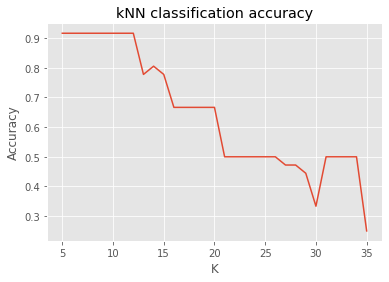

In [178]:
pylab.style.use("ggplot")
pylab.plot(range(5,36),corrects)
pylab.xlabel("K")
pylab.ylabel("Accuracy")
pylab.title("kNN classification accuracy")

In [ ]:
df

In [ ]:
dis

{5.913268433233372: [1, 0, 0, 0],
 10.898788253321534: [1, 0, 0, 0],
 7.917307169383037: [1, 0, 0, 0],
 207.79365672755804: [1, 0, 0, 0],
 208.13284113857296: [1, 0, 0, 0],
 207.87364849312826: [1, 0, 0, 0],
 260.4616141445979: [1, 0, 0, 0],
 260.83154953692394: [1, 0, 0, 0],
 255.530186297141: [1, 0, 0, 0],
 0.09809362637663176: [1, 0, 0, 0],
 0.3042135481199195: [1, 0, 0, 0],
 59.39076220975228: [1, 0, 0, 0],
 40.96684770518941: [1, 0, 0, 0],
 40.56678089764808: [1, 0, 0, 0],
 11.02053753061714: [1, 0, 0, 0],
 14.745458567219927: [1, 0, 0, 0],
 15.373055955983048: [1, 0, 0, 0],
 79.91569145677508: [1, 0, 0, 0],
 77.48697007956824: [1, 0, 0, 0],
 69.83959117187915: [1, 0, 0, 0],
 288.445996188691: [1, 0, 0, 0],
 289.4973097174805: [1, 0, 0, 0],
 289.2594342215996: [1, 0, 0, 0],
 187.13373917549222: [1, 0, 0, 0],
 187.31103801054098: [1, 0, 0, 0],
 187.1190551841227: [1, 0, 0, 0],
 246.17139394564597: [1, 0, 0, 0],
 245.92763071397056: [1, 0, 0, 0],
 245.9461901462956: [1, 0, 0, 0],
 2

In [ ]:
keys

[0.1685520305659401,
 0.8385694885986336,
 4.58204023758193,
 5.913268433233372,
 8.731895144298106,
 16.453339220443645,
 16.710168654613184,
 27.8421778250814,
 29.16608225239204,
 29.328511579515634,
 29.379688668667413,
 30.382451310080032,
 35.499083087373855,
 36.5604463305413,
 36.848883070610704,
 42.45414929323277,
 44.270303527974356,
 142.166278317138,
 142.5069577549301,
 143.13310340832382,
 157.91656018056517,
 158.19369135905671,
 158.84369871365286,
 183.913401068598,
 183.9355847308612,
 184.18359836210533,
 205.90146611197733,
 206.68811409805795,
 207.041378797352,
 207.34718531514272,
 211.84187539567836,
 212.38892185432297,
 230.01537386195912,
 231.14549741950157,
 231.40193856754485]